## imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## read data 

In [2]:
# READ -covid deaths by year Dataframe
mr_df = pd.read_csv("set1/keep data/covid_dondada_df.csv")

# Display sample data
mr_df.head()

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area,vaccinations,Mortality_Rate
0,United States,111820082,1219487,37.090240,-95.712891,339996563,37,9147420,358463653.0,1.090580
1,India,45035393,533570,20.593684,78.962880,1428627663,481,2973190,24564363.0,1.184779
2,France,40138560,167642,46.603354,1.888334,64756584,118,547557,14181642.0,0.417658
3,Germany,38828995,183027,51.165691,10.451526,83294633,239,348560,33013230.0,0.471367
4,Brazil,38743918,711380,-14.235004,-51.925280,216422446,26,8358140,9367645.0,1.836108


## regression 

In [3]:
mr_df = mr_df.dropna()
mr_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area,vaccinations,Mortality_Rate
0,United States,111820082,1219487,37.090240,-95.712891,339996563,37,9147420,358463653.0,1.090580
1,India,45035393,533570,20.593684,78.962880,1428627663,481,2973190,24564363.0,1.184779
2,France,40138560,167642,46.603354,1.888334,64756584,118,547557,14181642.0,0.417658
3,Germany,38828995,183027,51.165691,10.451526,83294633,239,348560,33013230.0,0.471367
4,Brazil,38743918,711380,-14.235004,-51.925280,216422446,26,8358140,9367645.0,1.836108
...,...,...,...,...,...,...,...,...,...,...
193,British Virgin Islands,7392,64,18.420695,-64.639968,31538,210,150,0.0,0.865801
194,Cook Islands,7203,2,-21.236736,-159.777671,17044,71,240,0.0,0.027766
195,Nauru,5393,1,-0.522778,166.931503,12780,639,20,0.0,0.018543
196,Kiribati,5085,24,-3.370417,-168.734039,133515,165,810,0.0,0.471976


## top 25 vaccinations 

In [4]:
top_25_vax_df = mr_df.nlargest(100, 'vaccinations')
top_25_vax_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area,vaccinations,Mortality_Rate
0,United States,111820082,1219487,37.090240,-95.712891,339996563,37,9147420,358463653.0,1.090580
8,England,24910387,232112,52.355518,-1.174320,67736802,280,241930,98410334.0,0.931788
30,Israel,4841772,12707,31.046051,34.851612,9174520,424,21640,83928749.0,0.262445
89,China,3440911,20196,35.861660,104.195397,1425671352,152,9388211,62767000.0,0.586938
66,United Arab Emirates,1067030,2349,23.424076,53.847818,9516871,114,83600,48174894.0,0.220144
...,...,...,...,...,...,...,...,...,...,...
86,Egypt,516023,24613,26.820553,30.802498,112716598,113,995450,0.0,4.769749
87,Qatar,514524,690,25.354826,51.183884,2716391,234,11610,0.0,0.134105
88,Libya,507274,6437,26.335100,17.228331,6888388,4,1759540,0.0,1.268939
90,Ethiopia,501157,7574,9.145000,40.489673,126527060,127,1000000,0.0,1.511303


In [5]:
slope_Mortality_Rate,intersept_Mortality_Rate,r_value,p_value,std = linregress(top_25_vax_df.vaccinations, top_25_vax_df.Mortality_Rate)
regression_value = top_25_vax_df.vaccinations * slope_Mortality_Rate + intersept_Mortality_Rate
regression_value

0     0.654346
8     1.011806
30    1.031712
89    1.060800
66    1.080858
        ...   
86    1.147077
87    1.147077
88    1.147077
90    1.147077
91    1.147077
Name: vaccinations, Length: 100, dtype: float64

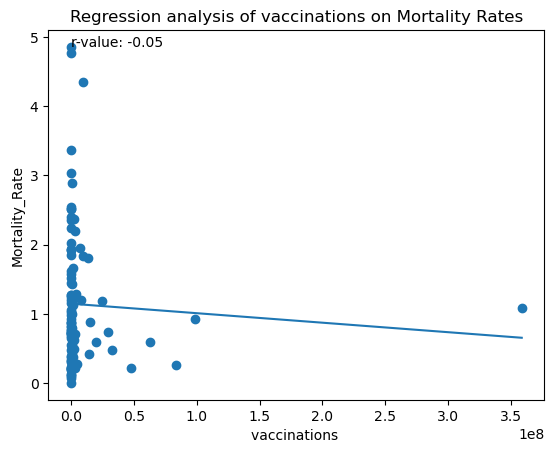

In [6]:
figure, chart = plt.subplots()
chart.scatter(top_25_vax_df.vaccinations, top_25_vax_df.Mortality_Rate)
chart.plot(top_25_vax_df.vaccinations,regression_value)
chart.set_xlabel ("vaccinations ")
chart.set_ylabel ("Mortality_Rate")
chart.set_title ("Regression analysis of vaccinations on Mortality Rates")
chart.annotate(f'r-value: {round(r_value,2)}', xy = (0,top_25_vax_df.Mortality_Rate.max()))
plt.show()

## top 25 vaccinations 

In [7]:
low_25_vax_df = mr_df.nlargest(100, 'vaccinations')
low_25_vax_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area,vaccinations,Mortality_Rate
0,United States,111820082,1219487,37.090240,-95.712891,339996563,37,9147420,358463653.0,1.090580
8,England,24910387,232112,52.355518,-1.174320,67736802,280,241930,98410334.0,0.931788
30,Israel,4841772,12707,31.046051,34.851612,9174520,424,21640,83928749.0,0.262445
89,China,3440911,20196,35.861660,104.195397,1425671352,152,9388211,62767000.0,0.586938
66,United Arab Emirates,1067030,2349,23.424076,53.847818,9516871,114,83600,48174894.0,0.220144
...,...,...,...,...,...,...,...,...,...,...
86,Egypt,516023,24613,26.820553,30.802498,112716598,113,995450,0.0,4.769749
87,Qatar,514524,690,25.354826,51.183884,2716391,234,11610,0.0,0.134105
88,Libya,507274,6437,26.335100,17.228331,6888388,4,1759540,0.0,1.268939
90,Ethiopia,501157,7574,9.145000,40.489673,126527060,127,1000000,0.0,1.511303


In [8]:
slope_Mortality_Rate,intersept_Mortality_Rate,r_value,p_value,std = linregress(top_25_vax_df.vaccinations, top_25_vax_df.Mortality_Rate)
regression_value = top_25_vax_df.vaccinations * slope_Mortality_Rate + intersept_Mortality_Rate
regression_value

0     0.654346
8     1.011806
30    1.031712
89    1.060800
66    1.080858
        ...   
86    1.147077
87    1.147077
88    1.147077
90    1.147077
91    1.147077
Name: vaccinations, Length: 100, dtype: float64

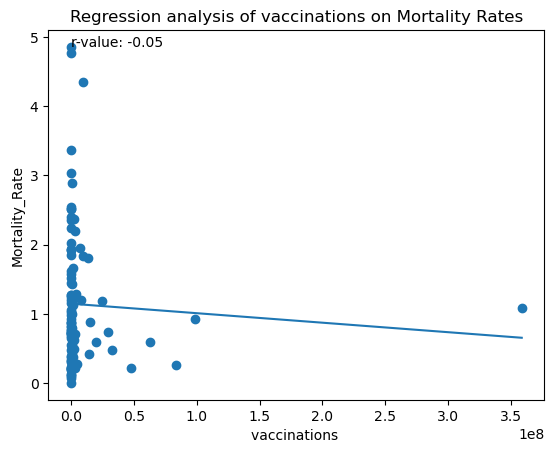

In [9]:
figure, chart = plt.subplots()
chart.scatter(top_25_vax_df.vaccinations, top_25_vax_df.Mortality_Rate)
chart.plot(top_25_vax_df.vaccinations,regression_value)
chart.set_xlabel ("vaccinations ")
chart.set_ylabel ("Mortality_Rate")
chart.set_title ("Regression analysis of vaccinations on Mortality Rates")
chart.annotate(f'r-value: {round(r_value,2)}', xy = (0,top_25_vax_df.Mortality_Rate.max()))
plt.show()

## low 25 vaccines 

In [22]:
low_25_vax_df = mr_df.nsmallest(100, 'vaccinations')
low_25_vax_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area,vaccinations,Mortality_Rate
5,South Korea,34571873,35934,35.907757,127.766922,51784059,533,97230,0.0,0.103940
6,Japan,33803572,74694,36.204824,138.252924,123294513,338,364555,0.0,0.220965
12,Australia,11853144,24414,-25.274398,133.775136,26439111,3,7682300,0.0,0.205971
13,Vietnam,11625195,43206,14.058324,108.277199,98858950,319,310070,0.0,0.371658
14,Taiwan,10241523,19005,23.697810,120.960515,23923276,676,35410,0.0,0.185568
...,...,...,...,...,...,...,...,...,...,...
151,Guinea,38572,468,9.945587,-9.696645,14190612,58,245720,0.0,1.213315
152,Bahamas,38084,844,25.034280,-77.396280,412623,41,10010,0.0,2.216154
154,Lesotho,36138,723,-29.609988,28.233608,2330318,77,30360,0.0,2.000664
155,Haiti,34667,860,18.971187,-72.285215,11724763,425,27560,0.0,2.480745


In [23]:
slope_Mortality_Rate,intersept_Mortality_Rate,r_value,p_value,std = linregress(low_25_vax_df.vaccinations, low_25_vax_df.Mortality_Rate)
regression_value = low_25_vax_df.vaccinations * slope_Mortality_Rate + intersept_Mortality_Rate
regression_value

ValueError: Cannot calculate a linear regression if all x values are identical

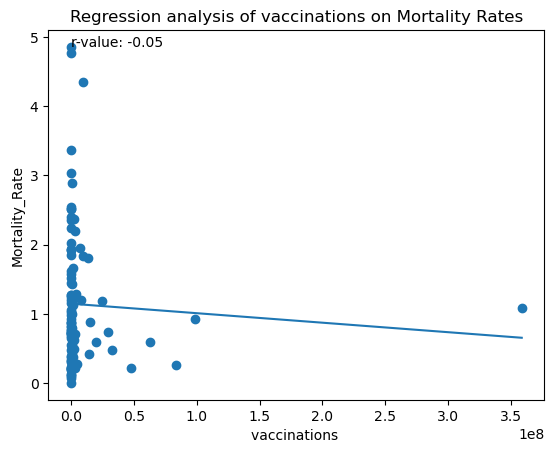

In [24]:
figure, chart = plt.subplots()
chart.scatter(top_25_vax_df.vaccinations, top_25_vax_df.Mortality_Rate)
chart.plot(top_25_vax_df.vaccinations,regression_value)
chart.set_xlabel ("vaccinations ")
chart.set_ylabel ("Mortality_Rate")
chart.set_title ("Regression analysis of vaccinations on Mortality Rates")
chart.annotate(f'r-value: {round(r_value,2)}', xy = (0,top_25_vax_df.Mortality_Rate.max()))
plt.show()

In [32]:
## Top Density to Mortality Rates

## rename column 

In [35]:
mr_df_dense = mr_df 

In [36]:
mr_df_dense.rename(columns={'Density(P/KMsq)': 'density'}, inplace=True)


In [51]:
top_25_dens_df = mr_df_dense.nsmallest(25, 'density')
top_25_dens_df

,Country,total_cases,total_deaths,latitude,longitude,Population,density,Land_Area,vaccinations,Mortality_Rate
184,Greenland,11971,21,71.706936,-42.604303,56643,0,410450,0.0,0.175424
69,Mongolia,1011496,2284,46.862496,103.846656,3447157,2,1553560,0.0,0.225804
12,Australia,11853144,24414,-25.274398,133.775136,26439111,3,7682300,0.0,0.205971
116,Namibia,172389,4106,-22.957640,18.490410,2604172,3,823290,0.0,2.381823
28,Canada,4946090,59034,56.130366,-106.346771,38781291,4,9093510,8403751.0,1.193549
88,Libya,507274,6437,26.335100,17.228331,6888388,4,1759540,0.0,1.268939
110,Iceland,209906,229,64.963051,-19.020835,375318,4,100250,41822.0,0.109096
126,French Guiana,98041,420,3.933889,-53.125782,312155,4,82200,0.0,0.428392
129,Suriname,82588,1408,3.919305,-56.027783,623236,4,156000,0.0,1.704848
133,Guyana,74137,1300,4.860416,-58.930180,813834,4,196850,0.0,1.753510


In [52]:
slope_Mortality_Rate,intersept_Mortality_Rate,r_value,p_value,std = linregress(top_25_dens_df.density, top_25_dens_df.Mortality_Rate)
regression_value = top_25_dens_df.density * slope_Mortality_Rate + intersept_Mortality_Rate
regression_value

184    0.903488
69     0.952159
12     0.976494
116    0.976494
28     1.000830
88     1.000830
110    1.000830
126    1.000830
129    1.000830
133    1.000830
100    1.025165
138    1.025165
53     1.073836
9      1.122507
143    1.122507
62     1.171178
52     1.268519
94     1.268519
192    1.268519
130    1.292855
15     1.317190
73     1.317190
74     1.317190
51     1.341526
134    1.341526
Name: density, dtype: float64

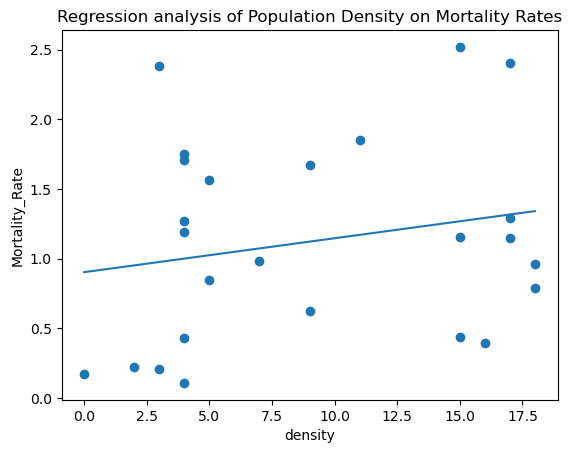

In [53]:
figure, chart = plt.subplots()
chart.scatter(top_25_dens_df.density, top_25_dens_df.Mortality_Rate)
chart.plot(top_25_dens_df.density,regression_value)
chart.set_xlabel ("density")
chart.set_ylabel ("Mortality_Rate")
chart.set_title ("Regression analysis of Population Density on Mortality Rates")
chart.annotate(f'r-value: {round(r_value,2)}', xy = (0,top_25_vax_df.Mortality_Rate.max()))
plt.show()